In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

results = json.load(open('results.json'))
bench_classes = list(results.keys())

raw_bench_speedup_results = [results[class_name]['speedup'] for class_name in bench_classes]
raw_bench_fidelity_results = [results[class_name]['fidelity_difference'] for class_name in bench_classes]

bench_speedup_results = []
bench_fidelity_results = []

for sub_result in raw_bench_speedup_results:
    bench_speedup_results.append([sub_result[str(i)] if str(i) in sub_result.keys() else 0 for i in range(6)])
    
for sub_result in raw_bench_fidelity_results:
    bench_fidelity_results.append([sub_result[str(i)] if str(i) in sub_result.keys() else 0 for i in range(6)])

labels = [['(4,16)', '(4,17)', '(4,18)', '(10,129)', '(10,133)', '(10,138)'], # adder
                ['(6,16)', '(8,22)', '(10,28)',  '(12,34)','(14,40)', '(16,46)'], # bv
                ['(13,92)', '(15,492)','(15,488)','(15,494)','(15,490)','(25,1477)'], # mul
                ['(6,58)', '(8,79)','(9,89)','(11,123)','(13,139)','(15,175)'], # qaoa
                ['(8,146)', '(10,237)','(12,344)','(14,472)','(16,619)','(18,787)'], # qft
                ['(4,53)', '(6,79)','(9,187)','(9,120)','(11,283)','(16,609)'], # qpe
                ['(10,330)', '(12,396)','(14,462)','(16,528)','(18,594)','(20,660)'], # qv
                ['(8,38)', '(9,45)', '(10,61)', '(12,90)', '(15,132)', '(16,160)'] # qsc
                ]
colors = ['#093145', '#107896', '#829356', '#bca136', '#c2571a', '#9a2617', '#5e3fba', '#a63382']

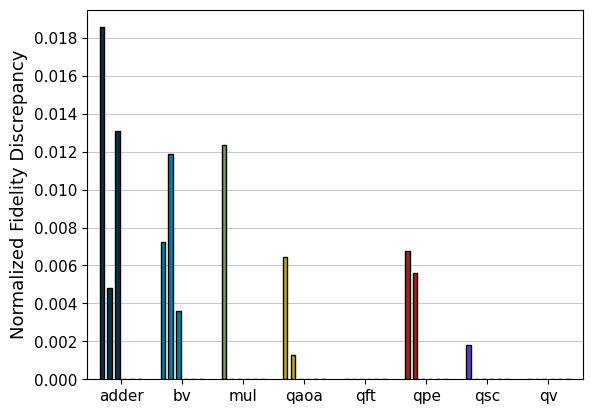

In [10]:
fig, ax = plt.subplots()

ticksize = 11
labelsize = 13

xticks = bench_classes
xticks_loc = [2.5, 10.5, 18.5, 26.5, 34.5, 42.5, 50.5, 58.5]

### set x,y axis limits
plt.xlim([-2, 63])
# plt.ylim([0.9, 1.005])

### set number of y-ticks
plt.locator_params(axis="y", nbins=16)

x = np.arange(1,5)

bar_width = 0.6
bar_gap = 0.4
group_gap = 3

bar_gap_total = bar_gap + bar_width
group_gap_total = 5*bar_gap_total + group_gap

ax.grid(zorder=0, axis='y',linewidth=0.5)

### set labels and x,y ticks

for i in range(8):    
    values = bench_fidelity_results[i]
 
    base_loc = i * group_gap_total
    
    sub_bar_loc = []
    for j in range(len(values)):
        sub_bar_loc.append(base_loc + j * bar_gap_total)
        
    ax.bar(sub_bar_loc, values, color=colors[i], edgecolor = "black", width=bar_width, zorder=3)

ax.set_ylabel("Normalized Fidelity Discrepancy",fontsize= labelsize)
# ax.set_xticklabels()

plt.yticks(fontsize=ticksize)
plt.xticks(xticks_loc, xticks,fontsize=ticksize)

plt.savefig("fidelity.png", dpi=1000, bbox_inches='tight')

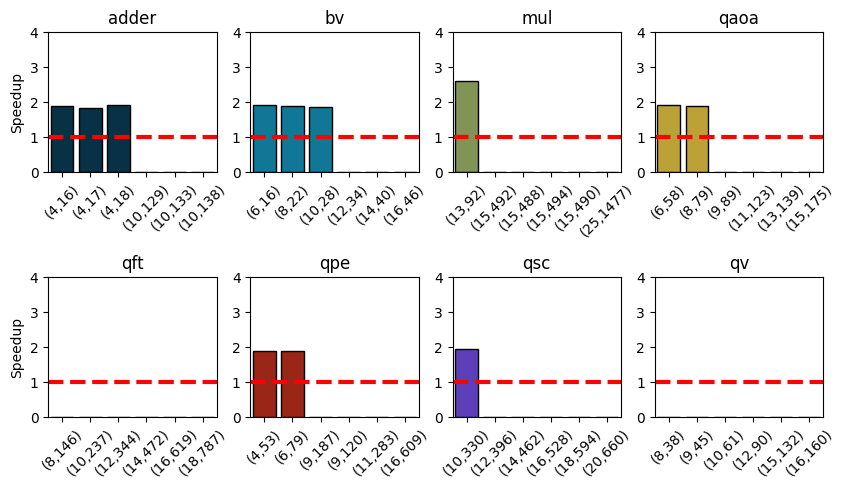

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
fig.subplots_adjust(hspace=0.75)

for i in range(8):
    ax = axs[i//4, i%4]
    
    sub_labels = labels[i]
    values = bench_speedup_results[i]

    num_missing = len(sub_labels) - len(values)
    for i in range(num_missing):
        values.append(0)

    ### set x,y axis limits
    ax.set_xlim([-0.5, len(sub_labels) - 0.5])
    ax.set_ylim([0, 4])
    
    if i == 0 or i == 4:
        ax.set_ylabel('Speedup')
    
    ax.set_yticks([0, 1, 2, 3, 4])
    
    ### set labels and x,y ticks
    ax.bar(sub_labels, values, color=colors[i], edgecolor = "black", width=0.8)
    
    ax.set_title(bench_classes[i], fontsize=12)
    ### Draw the horizontal reference line
    ax.plot([-0.5, len(sub_labels) - 0.5], [1, 1], "--", c='red', linewidth=3)
    
    # rotate the x-axis labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.savefig("speedup.png", dpi=1000, bbox_inches='tight')